In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, Ridge
from matplotlib import pyplot as plt
import pandas as pd

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [136]:
# generate regression dataset
X, y = make_regression(n_samples=10, n_features=1, n_informative=2, noise=10)

X.shape, y.shape

((10, 1), (10,))

In [137]:
X = X.T
X

array([[-2.17331508,  1.4264109 ,  0.66595927, -0.38920715,  0.07323988,
         0.93028432, -1.0553192 , -0.29962573,  0.60427822,  2.46547697]])

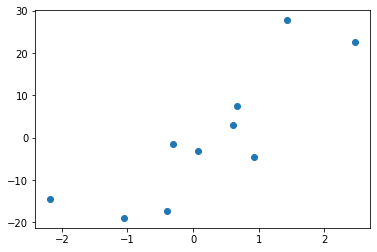

In [138]:
# plot regression dataset
plt.scatter(X,y)
plt.show()

In [55]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [56]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        errors.append(err)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, errors

def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors =[]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1

    for i in range(1, iterations+1):
        # эпоха обучения
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            errors.append(err)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))

    if i % (iterations / 10) == 0:
        print(i, W, err)
        
    return W, errors

def eval_reg_l2_model(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        errors.append(err)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T))) + (lambda_*(W**2))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, errors

def eval_reg_l1_model(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        errors.append(err)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T))) + (lambda_*(W**2))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, errors

In [140]:
W_1, errors = eval_model(X, y, iterations=1500, alpha=1e-3)

150 [3.30366374] 138.80622357001965
300 [5.78049788] 96.9368013564195
450 [7.31790318] 80.80511127418822
600 [8.27219198] 74.58980160066164
750 [8.86453228] 72.19513159764786
900 [9.23220612] 71.2724994643273
1050 [9.46042637] 70.91702248738918
1200 [9.60208585] 70.78006228779341
1350 [9.69001585] 70.72729347999359
1500 [9.74459522] 70.70696241239268


In [141]:
W_2, errors_sgd = eval_sgd_model(X, y, iterations=1500, qty_in_batch=64, alpha=1e-3)

1500 [9.74488204] 70.70688070659455


In [142]:
W_3, errors_l2 = eval_reg_l2_model(X, y, iterations=1500, alpha=1e-3, lambda_=1e-7)

150 [4.40988728] 117.68443066422856
300 [6.46676817] 88.80291005136881
450 [7.74325939] 77.67536510511427
600 [8.53541256] 73.38727393610651
750 [9.0269875] 71.73419993059989
900 [9.3320323] 71.09652409281485
1050 [9.52132478] 70.85027974949051
1200 [9.63878763] 70.75502788348932
1350 [9.71167732] 70.71808190458253
1500 [9.75690774] 70.70368907901364


In [143]:
W_4, errors_l1 = eval_reg_l1_model(X, y, iterations=1500, alpha=1e-3, lambda_=1e-7)

150 [3.43836908] 136.02516775863813
300 [5.86382637] 95.86888012412935
450 [7.36908289] 80.39790906997874
600 [8.30321206] 74.43655117299963
750 [8.88289519] 72.1387830425431
900 [9.24261679] 71.25264586992489
1050 [9.46583903] 70.9106009736259
1200 [9.60435676] 70.77838199821196
1350 [9.69031182] 70.72715326218791
1500 [9.74364976] 70.70723086979352


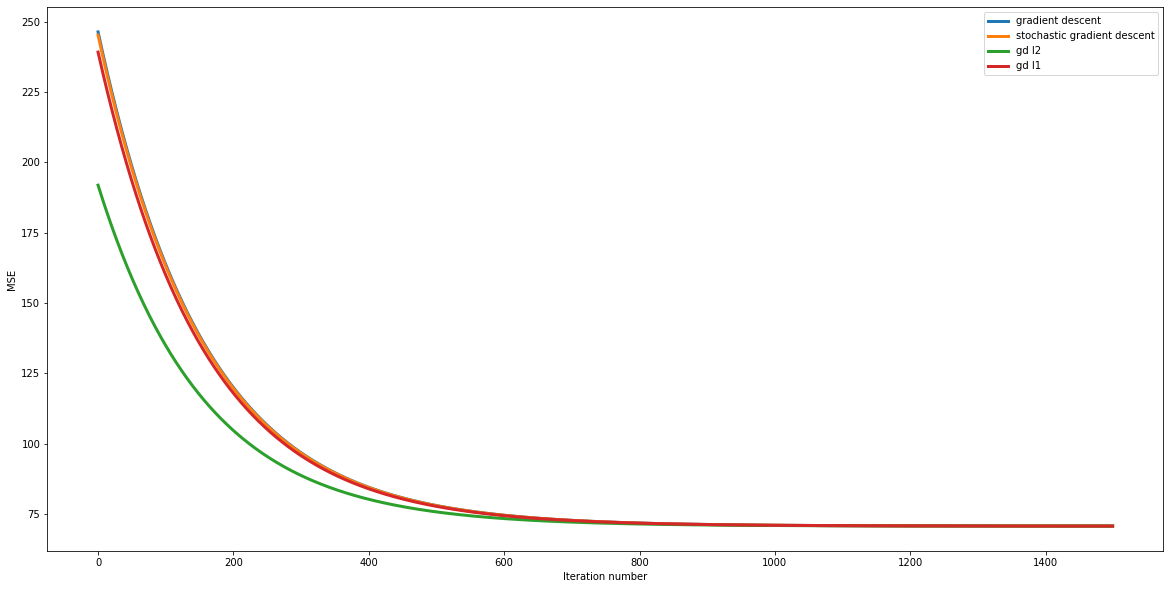

In [144]:
fig = plt.figure(figsize=(20,10))
plt.subplot(111)
plt.plot(errors, linewidth=3, label='gradient descent')
plt.plot(errors_sgd, linewidth=3, label='stochastic gradient descent')
plt.plot(errors_l2, linewidth=3, label='gd l2')
plt.plot(errors_l1, linewidth=3, label='gd l1')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()     

Скорость стахостического градиентного спуска выше (оранжевая линия) градиентного спуска, за 1500 итераций достигнута самая минимальная ошибка. Самой медленной оказалась модель градиентного спуска (синяя линия). l2 быстрее, чем l1. 